In [1]:
import pandas as pd

In [17]:
sentiments = {
    'en': pd.read_csv('generated_data/sentiments_numbers_en.csv', compression='gzip'),
    'fr': pd.read_csv('generated_data/sentiments_numbers_fr.csv', compression='gzip'),
    'ar': pd.read_csv('generated_data/sentiments_numbers_ar.csv', compression='gzip')
}


In [18]:
sentiments['fr'].head() 

,tweet,tweet_id,offensive,anger,irony,overall_negative_sentiment
0,@EspritGuerrier @flyingchair80 @mediocrassie @...,37,0.081394,0.466164,0.072578,-0.018425
1,🇺🇦 😢 l'appel à l'aide des civils d'une ville d...,52,0.086123,0.098035,0.565360,1.683819
2,@SainteMalouine Ah bah voilà : http,58,0.086264,0.019017,0.167099,-1.337702
3,@JumJum78795068 @Fawzi02427184 @koungou_cornei...,111,0.056071,0.011400,0.052692,-2.784931
4,@Thanatos_Arum @AchessT @CockRob96580772 C'est...,116,0.072649,0.099998,0.119610,-1.574881


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiments_cols = ['offensive', 'anger', 'irony']
languages = ['en', 'fr', 'ar']

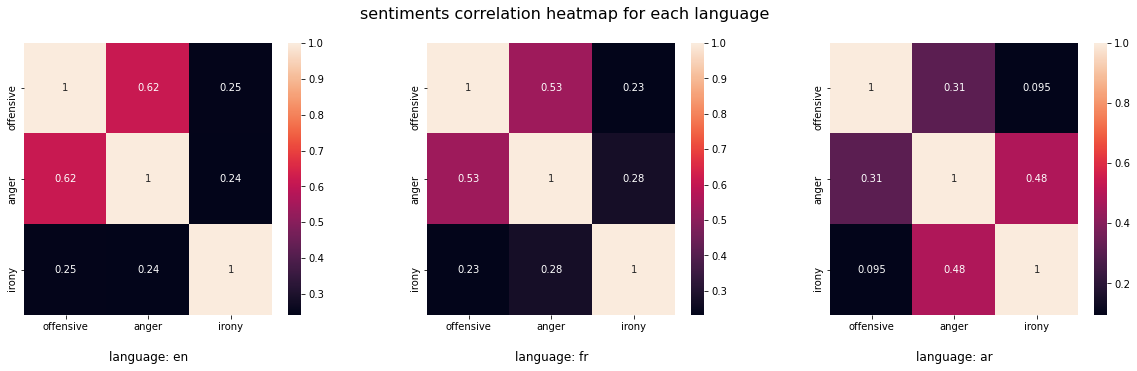

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), facecolor='white')


for i in range (len(languages)):
    language_tmp = languages[i]
    sns.heatmap(sentiments[language_tmp][sentiments_cols].corr(), annot=True, ax=axes[i])

    #plt.xlabel('f1 score', fontsize=14)
    axes[i].set_xlabel(f'\nlanguage: {language_tmp}', size=12)

plt.subplots_adjust(wspace = 0.3)

plt.suptitle('sentiments correlation heatmap for each language\n\n', fontsize=16)
plt.savefig('photos/correlation_sentiments.png', bbox_inches="tight")

In [10]:
sent_descriptive_stats = sentiments[sentiments_cols].describe().T.rename(columns={'50%': 'median'})
sent_descriptive_stats['sentiment'] = sent_descriptive_stats.index
sent_descriptive_stats.\
    sort_values(by='mean', inplace=True)
sent_descriptive_stats

,count,mean,std,min,25%,median,75%,max,sentiment
offensive,233748.0,0.135798,0.137444,0.016318,0.056739,0.090906,0.160028,0.952240,offensive
irony,233748.0,0.256533,0.243036,0.013407,0.074527,0.149152,0.369907,0.991891,irony
anger,233748.0,0.313653,0.311376,0.004280,0.059548,0.159825,0.539235,0.985782,anger


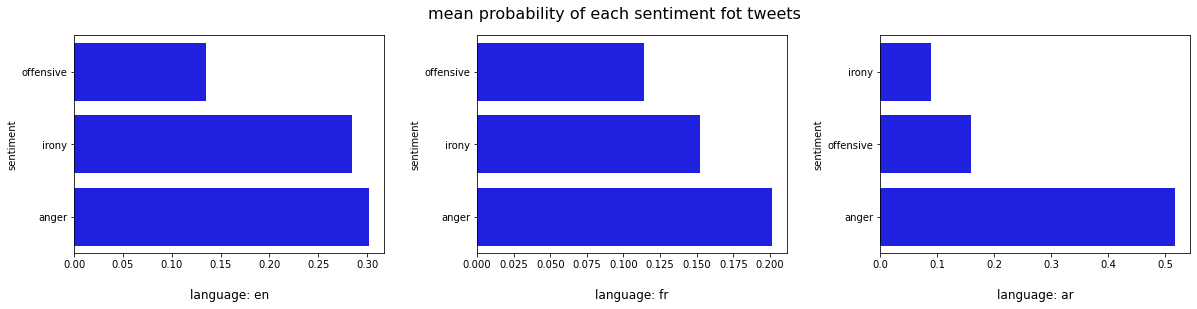

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4), facecolor='white')


for i in range (len(languages)):
    language_tmp = languages[i]

    sent_descriptive_stats = sentiments[language_tmp][sentiments_cols].describe().T.rename(columns={'50%': 'median'})
    sent_descriptive_stats['sentiment'] = sent_descriptive_stats.index
    sent_descriptive_stats.sort_values(by='mean', inplace=True)

    sns.barplot(data=sent_descriptive_stats, x='mean', y='sentiment', color='b', ax=axes[i])


    #plt.xlabel('f1 score', fontsize=14)
    axes[i].set_xlabel(f'\nlanguage: {language_tmp}', size=12)

plt.subplots_adjust(wspace = 0.3)

plt.suptitle('mean probability of each sentiment fot tweets\n', fontsize=16)

plt.savefig('photos/sentiments_means.png', bbox_inches="tight")

### get ditribution of sentiments

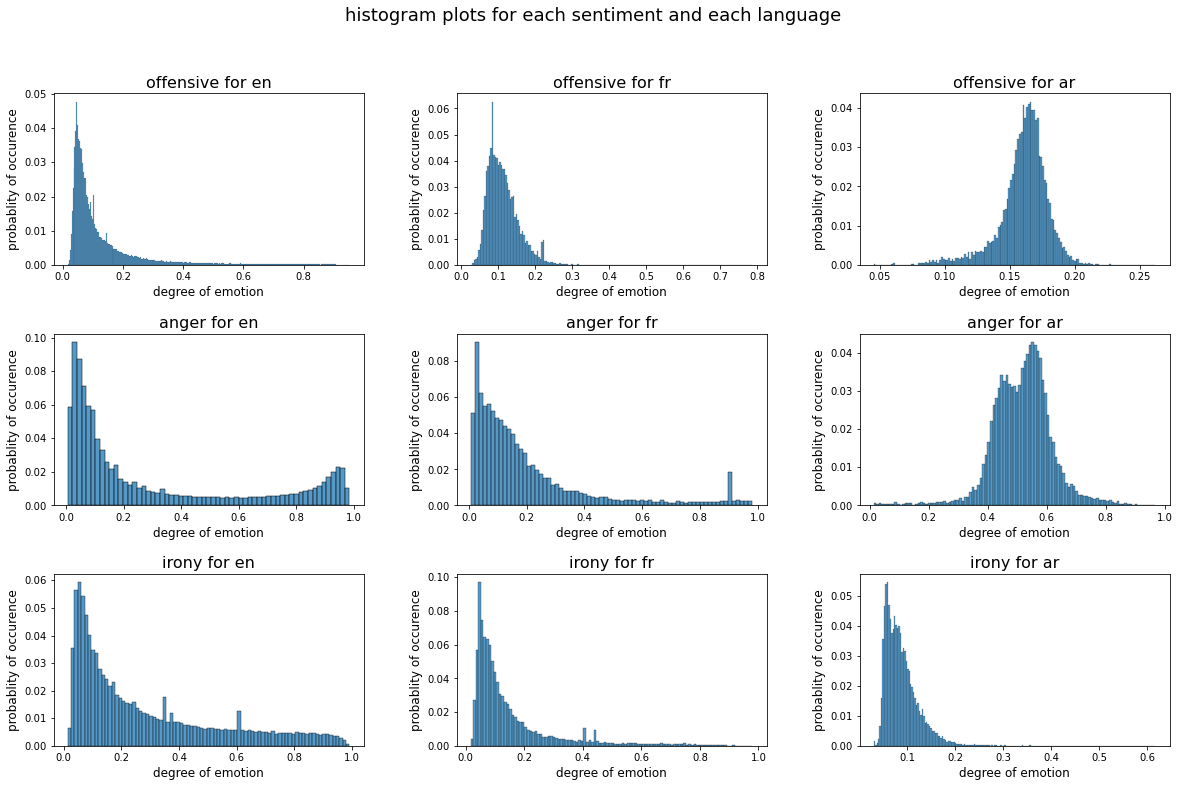

In [55]:
fig, axes = plt.subplots(3, 3, figsize=(20, 12), facecolor='white')

analysed_sentiments = ['offensive', 'anger', 'irony']

for j in range (len(languages)):
    language_tmp = languages[j]

    for i in range (len(analysed_sentiments)):
        sentiment_tmp = analysed_sentiments[i]
        sns.histplot(ax=axes[i, j], data=sentiments[language_tmp], x=sentiment_tmp, stat='probability')
        #plt.xlabel('f1 score', fontsize=14)
        axes[i, j].set_xlabel('degree of emotion', size=12)
        axes[i, j].set_ylabel('probablity of occurence', size=12)
        axes[i, j].set_title(f'{sentiment_tmp} for {language_tmp}', size=16)

    plt.subplots_adjust(wspace = 0.3)
    plt.subplots_adjust(hspace = 0.4)

plt.suptitle('histogram plots for each sentiment and each language', fontsize=18)

plt.savefig('photos/probas_counts_needed_plots.png', bbox_inches="tight")

In [56]:
"""import numpy as np

n_tot_rows = sentiments.shape[0]

thresholds_offensive = [0.3, 0.4, 0.5, 0.6]
thresholds_anger = [0.35, 0.5, 0.65, 0.8]

tot_data = []
for thresh_off in thresholds_offensive:
    data_one_row = []
    for thresh_ang in thresholds_anger:
        n_data = sentiments[(sentiments.anger>=thresh_ang) & (sentiments.offensive>=thresh_off)].shape[0]
        data_one_row.append(np.round( 100 * n_data / n_tot_rows, 1))

    tot_data.append(data_one_row)

    print(tot_data)
df = pd.DataFrame(data=tot_data, index=thresholds_anger, columns=thresholds_offensive)
df"""

'import numpy as np\n\nn_tot_rows = sentiments.shape[0]\n\nthresholds_offensive = [0.3, 0.4, 0.5, 0.6]\nthresholds_anger = [0.35, 0.5, 0.65, 0.8]\n\ntot_data = []\nfor thresh_off in thresholds_offensive:\n    data_one_row = []\n    for thresh_ang in thresholds_anger:\n        n_data = sentiments[(sentiments.anger>=thresh_ang) & (sentiments.offensive>=thresh_off)].shape[0]\n        data_one_row.append(np.round( 100 * n_data / n_tot_rows, 1))\n\n    tot_data.append(data_one_row)\n\n    print(tot_data)\ndf = pd.DataFrame(data=tot_data, index=thresholds_anger, columns=thresholds_offensive)\ndf'